# Homework2

James Guan; sg7993

In [2]:
import numpy as np
import pandas as pd

# Set display option to not use scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Now, when you view your DataFrame, it should display numbers in decimal format instead of scientific notation


In [3]:
def calcualte_monthly_payment(M0, c, n):
    """
    calcualte monthly payment
    :param M0: Total loan amount 
    :param c: Annual coupon rate
    :param n: total payment months
    :return: monthly payment
    """
    c = c / 12
    compound_rate = (1 + c) ** n
    B = M0 * c * compound_rate / (compound_rate - 1)
    return B


def calculate_WAC(c, balances):
    """
    calculate pool weighted average coupon (WAC)
    :param c: annual coupon rate
    :param balances: loan balances
    :return: pool WAC
    """
    c = c / 12
    total_balance = sum(balances)
    if int(total_balance) == 0:
        return 0
    total_payment = 0
    for i, balance in enumerate(balances):
        total_payment += balance * c
    return round(total_payment / total_balance * 12 ,5)

def calculate_WAL(all_principal_payments_list, all_balances_list, k):
    """
    calculate pool weighted average life (WAL)
    :param all_principal_payments_list: a list of principal payments for each loan from 0 to n (0 is the first principal payment)
    :param all_balances_list: a list of balances for each loan from 0 to n (principal balance at time 0 is the original loan amount)
    :param k: 
    :return: WAL pool
    """
    numerator = 0
    denominator = 0
    for l in range(len(all_principal_payments_list)):
        all_principal_payments = all_principal_payments_list[l]
        all_balances = all_balances_list[l]
        for time in range(k+1, len(all_principal_payments)):
            numerator += (time - k) * all_principal_payments[time]
        denominator += all_balances[k]
    if denominator == 0:
        return 0
    return round(numerator / denominator, 4)

# Loan from Pool1

Since each loan has the same characteristics, the loan size is the same and the WAC is the same. Given the loan is fixed rate, WAC remain same for the pool at 6.4%.

In [4]:
loan_size = 100_000
WAC1 = 0.064
WALA = 1
payment_period1 = 15 * 12 
loan_number = 1000
ind_monthly_payment1 = calcualte_monthly_payment(loan_size, WAC1, payment_period1)
pool_monthly_payment1 = ind_monthly_payment1 * loan_number
print("Individual loan monthly payment:", round(ind_monthly_payment1,4))
print("Total monthly payment:", round(pool_monthly_payment1, 4))


Individual loan monthly payment: 865.6194
Total monthly payment: 865619.4052


In [5]:
ind_interest_payment1 = WAC1/12 * loan_size
pool_interest_payment1 = ind_interest_payment1 * loan_number
print("Individual loan monthly interest payment:", round(ind_interest_payment1, 4))
print("Total monthly interest payment:", round(pool_interest_payment1, 4))

Individual loan monthly interest payment: 533.3333
Total monthly interest payment: 533333.3333


In [6]:
ind_principal_payment1 = ind_monthly_payment1 - ind_interest_payment1
pool_principal_payment1 = ind_principal_payment1 * loan_number
print("Individual loan monthly principal payment:", round(ind_principal_payment1, 4))
print("Total monthly principal payment:", round(pool_principal_payment1, 4))

Individual loan monthly principal payment: 332.2861
Total monthly principal payment: 332286.0718


In [7]:
total_months = 15 * 12
M0 = loan_size
c = WAC1 / 12
# Calculate lifecycle payment schedule
ind_remaining_principals = [M0]
ind_interest_payments = [0]
ind_principal_payments = [0]
for i in range(1, total_months+1):
    interest_payment = ind_remaining_principals[i-1] * c
    principal_payment = ind_monthly_payment1 - interest_payment
    remaining_principal = ind_remaining_principals[i-1] - principal_payment
    ind_remaining_principals.append(remaining_principal)
    ind_interest_payments.append(interest_payment)
    ind_principal_payments.append(principal_payment)

In [8]:
total_months = 15 * 12
c = WAC1 / 12
# Calculate lifecycle payment schedule
pool_remaining_principals = [M0 * loan_number]
pool_interest_payments = [0]
pool_principal_payments = [0]
for i in range(1, total_months+1):
    pool_interest_payment = ind_interest_payments[i] * loan_number
    pool_principal_payment = ind_principal_payments[i] * loan_number
    pool_remaining_principal = ind_remaining_principals[i] * loan_number
    pool_interest_payments.append(pool_interest_payment)
    pool_principal_payments.append(pool_principal_payment)
    pool_remaining_principals.append(pool_remaining_principal)

In [9]:
len(pool_remaining_principals)

181

In [10]:
remaining_month = [month_index for month_index in range(2, total_months + 1)]
unpaid_balance = [round(pool_remaining_principals[month_index],4) for month_index in remaining_month]
scheduled_principal_payments = [round(pool_principal_payments[month_index],4) for month_index in remaining_month]
unscheduled_principal_payments = [0] * len(remaining_month)
interest_expense = [round(pool_interest_payments[month_index],4) for month_index in remaining_month]

In [11]:
WACs = []
for month_index in remaining_month:
    WAC = calculate_WAC(WAC1, [pool_remaining_principals[month_index]]*loan_number)
    WACs.append(WAC)

In [12]:
WALs = []
for month_index in remaining_month:
    wal = calculate_WAL([ind_principal_payments]*loan_number, [ind_remaining_principals]*loan_number, month_index)
    WALs.append(wal)

In [13]:
pool1_result = pd.DataFrame({
    "Month": remaining_month,
    "Beginning Balance": np.round([pool_remaining_principals[month_index-1] for month_index in remaining_month], 4),
    "Scheduled Principal Payments": scheduled_principal_payments,
    "Unscheduled Principal Payments": unscheduled_principal_payments,
    "Interest Expense": interest_expense,
    "Unpaid Balance": unpaid_balance,
        "WAC": WACs,
    "WAL": WALs,
    "SMM": [0] * len(remaining_month),
})
pool1_result.set_index("Month", inplace=True)

In [16]:
pool1_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance,WAC,WAL,SMM
Month,,,,,,,,
2,99667713.9282,334058.2642,0,531561.1410,99333655.6640,0.0640,103.3385,0
3,99333655.6640,335839.9083,0,529779.4969,98997815.7557,0.0640,102.6856,0
4,98997815.7557,337631.0545,0,527988.3507,98660184.7012,0.0640,102.0336,0
5,98660184.7012,339431.7534,0,526187.6517,98320752.9478,0.0640,101.3824,0
6,98320752.9478,341242.0561,0,524377.3491,97979510.8917,0.0640,100.7320,0
...,...,...,...,...,...,...,...,...
176,4259700.1408,842901.0044,0,22718.4008,3416799.1364,0.0640,2.5066,0
177,3416799.1364,847396.4764,0,18222.9287,2569402.6600,0.0640,2.0035,0
178,2569402.6600,851915.9243,0,13703.4809,1717486.7357,0.0640,1.5013,0


<Axes: xlabel='Month'>

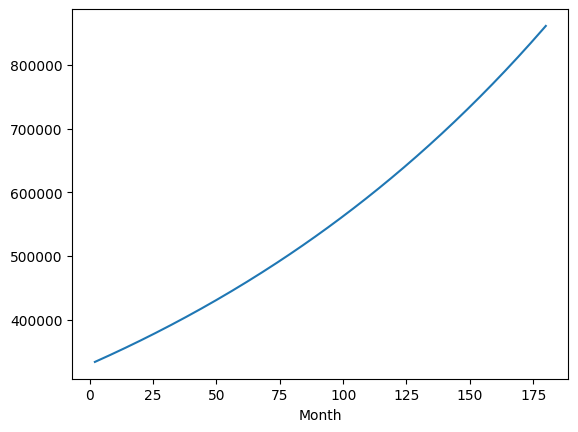

# Loan from Pool2

Pool2: 7000 loans are 30yr fixed-rate 6.80% WAC, 0 months WALA, SMM 1%. And assume that borrowers just prepay entire loan (nobody curtails). 

In [17]:
loan_number2 = 7000
loan_size = 100_000
WAC2 = 0.068
payment_period2 = 30 * 12 
pool2_ind_monthly_payment = calcualte_monthly_payment(loan_size, WAC2, payment_period2)
pool2_monthly_payment = pool2_ind_monthly_payment * loan_number2
print("Pool2 - Individual loan monthly payment:", round(pool2_ind_monthly_payment, 4))
print("Pool2 - Total monthly payment:", round(pool2_monthly_payment, 4))

pool2_ind_interest_payment = WAC2 / 12 * loan_size
pool2_interest_payment = pool2_ind_interest_payment * loan_number2
print("Pool2 - Individual loan monthly interest payment:", round(pool2_ind_interest_payment, 4))
print("Pool2 - Scheduled monthly interest payment:", round(pool2_interest_payment, 4))

pool2_ind_principal_payment = pool2_ind_monthly_payment - pool2_ind_interest_payment
pool2_principal_payment = pool2_ind_principal_payment * loan_number2
print("Pool2 - Individual loan monthly principal payment:", round(pool2_ind_principal_payment, 4))
print("Pool2 - Scheduled monthly principal payment:", round(pool2_principal_payment, 4))


Pool2 - Individual loan monthly payment: 651.9252
Pool2 - Total monthly payment: 4563476.3172
Pool2 - Individual loan monthly interest payment: 566.6667
Pool2 - Scheduled monthly interest payment: 3966666.6667
Pool2 - Individual loan monthly principal payment: 85.2585
Pool2 - Scheduled monthly principal payment: 596809.6505


In [18]:
total_months2 = 30 * 12
M0 = loan_size
c = WAC2 / 12
# Calculate lifecycle payment schedule
pool2_ind_remaining_principals = [M0]
pool2_ind_interest_payments = [0]
pool2_ind_principal_payments = [0]
for i in range(1, total_months2+1):
    interest_payment = pool2_ind_remaining_principals[i - 1] * c
    principal_payment = pool2_ind_monthly_payment - interest_payment
    remaining_principal = pool2_ind_remaining_principals[i - 1] - principal_payment
    pool2_ind_remaining_principals.append(remaining_principal)
    pool2_ind_interest_payments.append(interest_payment)
    pool2_ind_principal_payments.append(principal_payment)

In pool2, there is a 1% SMM. Loan number will change throughout the lifecycle.

In [19]:
import math

SMM2 = 0.01
pool2_loan_numbers = [loan_number2]

for i in range(1, total_months2+1):
    next_month_loan_number = pool2_loan_numbers[i-1] - math.floor(pool2_loan_numbers[i-1] * SMM2)
    pool2_loan_numbers.append(next_month_loan_number)

In [20]:
pool2_ind_principal_payment

85.258521498243

In [21]:
pool2_total_months = 30 * 12
c = WAC2 / 12
# Calculate lifecycle payment schedule
pool2_remaining_principals = [loan_size * loan_number2]

pool2_interest_payments = [0]
pool2_principal_payments = [0]
pool2_scheduled_principal_payments = [0]
pool2_unscheduled_principal_payments = [0]
for i in range(1, pool2_total_months+1):
    pool2_interest_payment = pool2_ind_interest_payments[i] * pool2_loan_numbers[i-1]
    pool2_scheduled_principal_payment = pool2_ind_principal_payments[i] * pool2_loan_numbers[i-1]
    pool2_principal_payment = pool2_ind_principal_payments[i] * pool2_loan_numbers[i] + (pool2_loan_numbers[i-1] - pool2_loan_numbers[i]) * pool2_ind_remaining_principals[i-1]
    pool2_unscheduled_principal_payment =  pool2_principal_payment -pool2_scheduled_principal_payment
    pool2_remaining_principal = pool2_ind_remaining_principals[i] * pool2_loan_numbers[i]
    pool2_interest_payments.append(pool2_interest_payment)
    pool2_principal_payments.append(pool2_principal_payment)
    pool2_scheduled_principal_payments.append(pool2_scheduled_principal_payment)
    pool2_unscheduled_principal_payments.append(pool2_unscheduled_principal_payment)
    pool2_remaining_principals.append(pool2_remaining_principal)

In [22]:
pool2_remaining_month = [month_index for month_index in range(1, pool2_total_months + 1)]
pool2_unpaid_balance = [round(pool2_remaining_principals[month_index],4) for month_index in pool2_remaining_month]
pool2_interest_expense = [round(pool2_interest_payments[month_index],4) for month_index in pool2_remaining_month]

In [23]:
pool2_WACs = []
for month_index in pool2_remaining_month:
    wac = calculate_WAC(WAC2, [pool2_remaining_principals[month_index]]*pool2_loan_numbers[month_index])
    pool2_WACs.append(wac)

In [24]:
pool2_WALs = []
for month_index in pool2_remaining_month:
    wal = calculate_WAL([pool2_ind_principal_payments] * pool2_loan_numbers[month_index],  
                        [pool2_ind_remaining_principals] * pool2_loan_numbers[month_index], 
                        month_index)
    pool2_WALs.append(wal)

Now let us calculate SSM for pool2.

In [25]:
pool2_scheduled_principal_payments[0:5]

[0, 596809.650487701, 594189.6561220603, 591607.0317884308, 589062.7737673998]

In [26]:
# SMM_t = (Scheduled Balance_t - Actual Balance_t) / Scheduled Balance_t
pool2_SMMs = [0]
for i in range(1, pool2_total_months+1):
    previous_remaining_principal = pool2_remaining_principals[i-1]
    scheduled_principal_payment = pool2_scheduled_principal_payments[i]
    scheduled_balance = previous_remaining_principal - scheduled_principal_payment
    actual_balance = pool2_remaining_principals[i]
    SMM = (scheduled_balance - actual_balance) / scheduled_balance
    pool2_SMMs.append(SMM)

In [27]:
pool2_result = pd.DataFrame({
    "Month": pool2_remaining_month,
    "Beginning Balance": np.round([pool2_remaining_principals[month_index-1] for month_index in pool2_remaining_month], 4),
    "Scheduled Principal Payments": np.round([pool2_scheduled_principal_payments[month_index] for month_index in pool2_remaining_month], 4),
    "Unscheduled Principal Payments": np.round([pool2_unscheduled_principal_payments[month_index] for month_index in pool2_remaining_month], 4),
    "Interest Expense": pool2_interest_expense,
    "Unpaid Balance": pool2_unpaid_balance,
    "WAC": pool2_WACs,
    "WAL": pool2_WALs,
    "SMM": np.round([pool2_SMMs[month_index] for month_index in pool2_remaining_month], 4),
})
pool2_result.set_index("Month", inplace=True)

In [28]:
pool2_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance,WAC,WAL,SMM
Month,,,,,,,,
1,700000000.0000,596809.6505,6994031.9035,3966666.6667,692409158.4460,0.0680,236.8956,0.0100
2,692409158.4460,594189.6561,6888200.9880,3923651.8979,684926767.8019,0.0680,236.0982,0.0100
3,684926767.8019,591607.0318,6782508.5166,3881251.6842,677552652.2536,0.0680,235.3015,0.0099
4,677552652.2536,589062.7738,6676955.7626,3839465.0294,670286633.7172,0.0680,234.5054,0.0099
5,670286633.7172,586557.8912,6671112.8576,3798290.9244,663028962.9684,0.0680,233.7099,0.0100
...,...,...,...,...,...,...,...,...
356,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042,0.0680,2.5071,0.0080
357,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324,0.0680,2.0038,0.0081
358,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432,0.0680,1.5014,0.0082


# Loan from Pool3

Pool 3: 2,000 loans are 30yr fixed-rate 7.70% WAC, 3 months WALA, SMM 2%. And assume borrowers just curtail (nobody prepays the entire loan, except for the very last payment).


In [30]:
loan_number3 = 2000
loan_size = 100_000
WAC3 = 0.077
payment_period3 = 30 * 12
pool3_ind_monthly_payment = calcualte_monthly_payment(loan_size, WAC3, payment_period3)
pool3_monthly_payment = pool3_ind_monthly_payment * loan_number3
print("Pool3 - Individual loan monthly payment:", round(pool3_ind_monthly_payment, 4))
print("Pool3 - Shceduled monthly payment:", round(pool3_monthly_payment, 4))

pool3_ind_interest_payment = WAC3 / 12 * loan_size
pool3_interest_payment = pool3_ind_interest_payment * loan_number3
print("Pool3 - Individual loan monthly interest payment:", round(pool3_ind_interest_payment, 4))
print("Pool3 - Scheduled monthly interest payment:", round(pool3_interest_payment, 4))

pool3_ind_principal_payment = pool3_ind_monthly_payment - pool3_ind_interest_payment
pool3_principal_payment = pool3_ind_principal_payment * loan_number3
print("Pool3 - Individual loan monthly principal payment:", round(pool3_ind_principal_payment, 4))
print("Pool3 - Scheduled monthly principal payment:", round(pool3_principal_payment, 4))

Pool3 - Individual loan monthly payment: 712.9602
Pool3 - Shceduled monthly payment: 1425920.3477
Pool3 - Individual loan monthly interest payment: 641.6667
Pool3 - Scheduled monthly interest payment: 1283333.3333
Pool3 - Individual loan monthly principal payment: 71.2935
Pool3 - Scheduled monthly principal payment: 142587.0143


In pool3, there is a 2% SMM. Loan number will remain same throughout the lifecycle but each loan will curtail 2% of the remaining principal.

In [31]:
total_months3 = 30 * 12
M0 = loan_size
c = WAC3 / 12
SMM3 = 0.02
# Calculate lifecycle payment schedule
pool3_ind_remaining_principals = [M0]
pool3_ind_interest_payments = [0]
pool3_ind_scheduled_principal_payments = [0]
pool3_ind_unscheduled_principal_payments = [0]
pool3_actual_months = [0]
for i in range(1, total_months3+1):
    pool3_actual_months.append(i)
    interest_payment = pool3_ind_remaining_principals[i-1] * c
    scheduled_principal_payment = pool3_ind_monthly_payment - interest_payment
    scheduled_balance = pool3_ind_remaining_principals[i-1] - scheduled_principal_payment
    if scheduled_balance <= 0: # this is the last payment
        scheduled_balance = pool3_ind_remaining_principals[i-1]
        pool3_ind_remaining_principals.append(0)
        pool3_ind_interest_payments.append(interest_payment)
        pool3_ind_scheduled_principal_payments.append(scheduled_balance)
        pool3_ind_unscheduled_principal_payments.append(0)
        print("Last payment month:", i,  scheduled_balance)
        break
    # actual balance = Scheduled balance - Scheduled Balance * SMM
    previous_remaining_principal = pool3_ind_remaining_principals[i-1]
    remaining_principal = scheduled_balance - scheduled_balance * SMM3
    unscheduled_principal_payment = previous_remaining_principal - remaining_principal - scheduled_principal_payment
    pool3_ind_remaining_principals.append(remaining_principal)
    pool3_ind_interest_payments.append(interest_payment)
    pool3_ind_scheduled_principal_payments.append(scheduled_principal_payment)
    pool3_ind_unscheduled_principal_payments.append(unscheduled_principal_payment)

Last payment month: 79 466.18101987031116


Now let us aggregate all the loan together for the pool3.

In [32]:
pool3_remaining_principals = [M0 * loan_number3]
pool3_interest_payments = [0]
pool3_scheduled_principal_payments = [0]
pool3_unscheduled_principal_payments = [0]

for i in range(1, pool3_actual_months[-1]+1):
    pool3_interest_payment = pool3_ind_interest_payments[i] * loan_number3
    pool3_scheduled_principal_payment = pool3_ind_scheduled_principal_payments[i] * loan_number3
    pool3_remaining_principal = pool3_ind_remaining_principals[i] * loan_number3
    pool3_unscheduled_principal_payment = pool3_ind_unscheduled_principal_payments[i] * loan_number3
    pool3_interest_payments.append(pool3_interest_payment)
    pool3_scheduled_principal_payments.append(pool3_scheduled_principal_payment)
    pool3_remaining_principals.append(pool3_remaining_principal)
    pool3_unscheduled_principal_payments.append(pool3_unscheduled_principal_payment)    

In [33]:
remaining_month3 = [month_index for month_index in range(4, pool3_actual_months[-1]+1)]
pool3_unpaid_balance = [round(pool3_remaining_principals[month_index],4) for month_index in remaining_month3]
pool3_scheduled_principal_payments = [round(pool3_scheduled_principal_payments[month_index],4) for month_index in remaining_month3]
pool3_unscheduled_principal_payments = [round(pool3_unscheduled_principal_payments[month_index],4) for month_index in remaining_month3]
pool3_interest_expense = [round(pool3_interest_payments[month_index],4) for month_index in remaining_month3]

In [34]:
pool3_unpaid_balance[0:5]

[183778532.3534, 179861220.4366, 175997621.395, 172186998.7356, 168428626.0638]

In [35]:
WACs = []
for month_index in remaining_month3:
    WAC = calculate_WAC(WAC3, [pool3_remaining_principals[month_index]]*loan_number3)
    WACs.append(WAC)

In [36]:
WALs = []
for month_index in remaining_month3:
    wal = calculate_WAL([pool3_ind_scheduled_principal_payments]*loan_number3, [pool3_ind_remaining_principals]*loan_number3, month_index)
    WALs.append(wal)

In [37]:
pool3_result = pd.DataFrame({
    "Month": remaining_month3,
    "Beginning Balance": np.round([pool3_remaining_principals[month_index-1] for month_index in remaining_month3], 4),
    "Scheduled Principal Payments": pool3_scheduled_principal_payments,
    "Unscheduled Principal Payments": pool3_unscheduled_principal_payments,
    "Interest Expense": pool3_interest_expense,
    "Unpaid Balance": pool3_unpaid_balance,
    "WAC": WACs,
    "WAL": WALs,
    "SMM": [0.02] * len(remaining_month3),
})
pool3_result.set_index("Month", inplace=True)

In [38]:
pool3_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance,WAC,WAL,SMM
Month,,,,,,,,
4,187750303.8775,221189.2311,3750582.2929,1204731.1165,183778532.3534,0.0770,17.2090,0.0200
5,183778532.3534,246674.7651,3670637.1518,1179245.5826,179861220.4366,0.0770,17.1987,0.0200
6,179861220.4366,271810.8499,3591788.1917,1154109.4978,175997621.3950,0.0770,17.1840,0.0200
7,175997621.3950,296602.2771,3514020.3824,1129318.0706,172186998.7356,0.0770,17.1650,0.0200
8,172186998.7356,321053.7725,3437318.8993,1104866.5752,168428626.0638,0.0770,17.1416,0.0200
...,...,...,...,...,...,...,...,...
75,6771899.4448,1382467.3262,107788.6424,43453.0214,5281643.4762,0.0770,2.3017,0.0200
76,5281643.4762,1392029.8020,77792.2735,33890.5456,3811821.4007,0.0770,1.8417,0.0200
77,3811821.4007,1401461.1604,48207.2048,24459.1873,2362153.0355,0.0770,1.3867,0.0200


# Pass-Through

Now we aggregate all the loans from pool1, pool2, and pool3 to create a pass-through.

The servicing fee + g-free is 0.0075.

In [46]:
p1 = pool1_result.copy()[["Beginning Balance", "Scheduled Principal Payments", "Unscheduled Principal Payments", "Interest Expense", "Unpaid Balance"]]
p1.reset_index(inplace=True, drop=True)
p2 = pool2_result.copy()[["Beginning Balance", "Scheduled Principal Payments", "Unscheduled Principal Payments", "Interest Expense", "Unpaid Balance"]]
p2.reset_index(inplace=True, drop=True)
p3 = pool3_result.copy()[["Beginning Balance", "Scheduled Principal Payments", "Unscheduled Principal Payments", "Interest Expense", "Unpaid Balance"]]
p3.reset_index(inplace=True, drop=True)

In [47]:
p1

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance
0,99667713.9282,334058.2642,0,531561.1410,99333655.6640
1,99333655.6640,335839.9083,0,529779.4969,98997815.7557
2,98997815.7557,337631.0545,0,527988.3507,98660184.7012
3,98660184.7012,339431.7534,0,526187.6517,98320752.9478
4,98320752.9478,341242.0561,0,524377.3491,97979510.8917
...,...,...,...,...,...
174,4259700.1408,842901.0044,0,22718.4008,3416799.1364
175,3416799.1364,847396.4764,0,18222.9287,2569402.6600
176,2569402.6600,851915.9243,0,13703.4809,1717486.7357
177,1717486.7357,856459.4759,0,9159.9293,861027.2598


In [48]:
p2

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance
0,700000000.0000,596809.6505,6994031.9035,3966666.6667,692409158.4460
1,692409158.4460,594189.6561,6888200.9880,3923651.8979,684926767.8019
2,684926767.8019,591607.0318,6782508.5166,3881251.6842,677552652.2536
3,677552652.2536,589062.7738,6676955.7626,3839465.0294,670286633.7172
4,670286633.7172,586557.8912,6671112.8576,3798290.9244,663028962.9684
...,...,...,...,...,...
355,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042
356,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324
357,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432
358,314162.7432,156637.5652,1296.5035,1780.2555,156228.6745


In [49]:
pass_through_result = p1.add(p2, fill_value=0).add(p3, fill_value=0)
pass_through_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance
0,987418017.8057,1152057.1458,10744614.1964,5702958.9242,975521346.4634
1,975521346.4634,1176704.3295,10558838.1398,5632676.9774,963785803.9942
2,963785803.9942,1201048.9362,10374296.7083,5563349.5327,952210458.3498
3,952210458.3498,1225096.8043,10190976.1450,5494970.7517,940794385.4006
4,940794385.4006,1248853.7198,10108431.7569,5427534.8487,929437099.9239
...,...,...,...,...,...
355,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042
356,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324
357,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432
358,314162.7432,156637.5652,1296.5035,1780.2555,156228.6745


In [50]:
pass_through_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance
0,987418017.8057,1152057.1458,10744614.1964,5702958.9242,975521346.4634
1,975521346.4634,1176704.3295,10558838.1398,5632676.9774,963785803.9942
2,963785803.9942,1201048.9362,10374296.7083,5563349.5327,952210458.3498
3,952210458.3498,1225096.8043,10190976.1450,5494970.7517,940794385.4006
4,940794385.4006,1248853.7198,10108431.7569,5427534.8487,929437099.9239
...,...,...,...,...,...
355,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042
356,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324
357,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432
358,314162.7432,156637.5652,1296.5035,1780.2555,156228.6745


Let us calculate the same metric for the pass-through.

## WAC

In [51]:
from typing import List
def calculate_WAC_mutliple(coupon_rates: List[float], balances_list: List[List[float]]):
    numerator = 0
    denominator = 0
    
    for c, balances in zip(coupon_rates, balances_list):
        c = c / 12
        denominator += sum(balances)
        for i, balance in enumerate(balances):
            numerator += balance * c
    
    return round(numerator / denominator * 12, 5)

In [52]:
pass_through_WACs = []
for i in range(len(pass_through_result)):
    try:
        pool1_month_index = remaining_month[i]
        pool1_balances = [pool_remaining_principals[pool1_month_index]] * loan_number
    except:
        pool1_balances = [0] * loan_number
    
    try:
        pool2_month_index = pool2_remaining_month[i]
        pool2_balances = [pool2_remaining_principals[pool2_month_index]]*pool2_loan_numbers[pool2_month_index]
    except:
        pool2_balances = [0]* pool2_loan_numbers[pool2_month_index]
    
    try:
        pool3_month_index = remaining_month3[i]
        pool3_balances = [pool3_remaining_principals[pool3_month_index]]*loan_number3
    except:
        pool3_balances = [0]*loan_number3
    
    WAC = calculate_WAC_mutliple([WAC1, WAC2, WAC3], [pool1_balances, pool2_balances, pool3_balances])
    pass_through_WACs.append(WAC)

## WAL

In [53]:
def calculate_WAL_multiple(list_of_all_principal_payments_list, list_of_all_balances_list, ks):
    numerator = 0
    denominator = 0
    for all_principal_payments_list, all_balances_list, k in zip(list_of_all_principal_payments_list, list_of_all_balances_list, ks):
        for l in range(len(all_principal_payments_list)):
            all_principal_payments = all_principal_payments_list[l]
            all_balances = all_balances_list[l]
            if k >= len(all_principal_payments):
                continue
            for time in range(k+1, len(all_principal_payments)):
                numerator += (time - k) * all_principal_payments[time]
            denominator += all_balances[k]
    if denominator == 0:
        return 0
    return round(numerator / denominator, 4)

In [54]:
pass_through_WALs = []
for i in range(len(pass_through_result)):
    list_of_all_principal_payments_list = []
    list_of_all_balances_list = []
    ks = []
    try:
        pool1_k = remaining_month[i]
        pool1_all_principal_payments_list = [ind_principal_payments]*loan_number
        pool1_all_balances_list = [ind_remaining_principals]*loan_number
        
        list_of_all_principal_payments_list.append(pool1_all_principal_payments_list)
        list_of_all_balances_list.append(pool1_all_balances_list)
        ks.append(pool1_k)
    except:
        pass
    
    try:
        pool2_k = pool2_remaining_month[i]
        pool2_all_principal_payments_list = [pool2_ind_principal_payments]*pool2_loan_numbers[pool2_k]
        pool2_all_balances_list = [pool2_ind_remaining_principals]*pool2_loan_numbers[pool2_k]
        
        list_of_all_principal_payments_list.append(pool2_all_principal_payments_list)
        list_of_all_balances_list.append(pool2_all_balances_list)
        ks.append(pool2_k)
    except:
        pass
        
    try:
        pool3_k = remaining_month3[i]
        pool3_all_principal_payments_list = [pool3_ind_scheduled_principal_payments]*loan_number3
        pool3_all_balances_list = [pool3_ind_remaining_principals]*loan_number3
        
        list_of_all_principal_payments_list.append(pool3_all_principal_payments_list)
        list_of_all_balances_list.append(pool3_all_balances_list)
        ks.append(pool3_k)
    except:
        pass
    
    WAL = calculate_WAL_multiple(list_of_all_principal_payments_list, list_of_all_balances_list, ks)
    pass_through_WALs.append(WAL)
    


In [55]:
pass_through_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance
0,987418017.8057,1152057.1458,10744614.1964,5702958.9242,975521346.4634
1,975521346.4634,1176704.3295,10558838.1398,5632676.9774,963785803.9942
2,963785803.9942,1201048.9362,10374296.7083,5563349.5327,952210458.3498
3,952210458.3498,1225096.8043,10190976.1450,5494970.7517,940794385.4006
4,940794385.4006,1248853.7198,10108431.7569,5427534.8487,929437099.9239
...,...,...,...,...,...
355,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042
356,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324
357,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432
358,314162.7432,156637.5652,1296.5035,1780.2555,156228.6745


In [56]:
pass_through_result['SMM']=((pass_through_result["Beginning Balance"] - pass_through_result["Scheduled Principal Payments"] - pass_through_result['Unpaid Balance'])/
 (pass_through_result["Beginning Balance"] - pass_through_result["Scheduled Principal Payments"])).fillna(0) # (Scheduled Balance - Actual Balance)/ Scheduled Balance

In [57]:
pass_through_result["WAC"] = pass_through_WACs
pass_through_result["WAL"] = pass_through_WALs

Now, let us calcualte net coupon per month

In [58]:
pass_through_result["Net Coupon"] = pass_through_result["Scheduled Principal Payments"] + pass_through_result["Unscheduled Principal Payments"] + pass_through_result["Interest Expense"] * (1- 0.0075)

In [59]:
pass_through_result

,Beginning Balance,Scheduled Principal Payments,Unscheduled Principal Payments,Interest Expense,Unpaid Balance,SMM,WAC,WAL,Net Coupon
0,987418017.8057,1152057.1458,10744614.1964,5702958.9242,975521346.4634,0.0109,0.0685,181.9092,17556858.0745
1,975521346.4634,1176704.3295,10558838.1398,5632676.9774,963785803.9942,0.0108,0.0685,181.5435,17325974.3694
2,963785803.9942,1201048.9362,10374296.7083,5563349.5327,952210458.3498,0.0108,0.0685,181.1786,17096970.0557
3,952210458.3498,1225096.8043,10190976.1450,5494970.7517,940794385.4006,0.0107,0.0685,180.8146,16869831.4204
4,940794385.4006,1248853.7198,10108431.7569,5427534.8487,929437099.9239,0.0108,0.0685,180.4460,16744113.8140
...,...,...,...,...,...,...,...,...,...
355,798029.2561,157807.2061,5142.3458,4522.1658,635079.7042,0.0080,0.0680,2.5071,167437.8015
356,635079.7042,157426.7365,3867.6354,3598.7850,473785.3324,0.0081,0.0680,2.0038,164866.1660
357,473785.3324,157036.8876,2585.7016,2684.7836,314162.7432,0.0082,0.0680,1.5014,162287.2369
358,314162.7432,156637.5652,1296.5035,1780.2555,156228.6745,0.0082,0.0680,1.0000,159700.9723


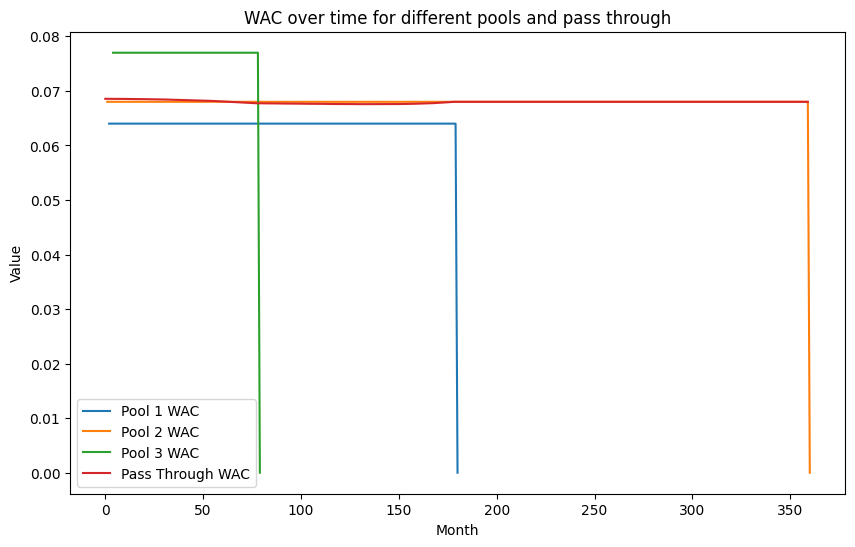

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(pool1_result.index, pool1_result['WAC'], label='Pool 1 WAC')
plt.plot(pool2_result.index, pool2_result['WAC'], label='Pool 2 WAC')
plt.plot(pool3_result.index, pool3_result['WAC'], label='Pool 3 WAC')
plt.plot(pass_through_result.index, pass_through_result['WAC'], label='Pass Through WAC')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('WAC over time for different pools and pass through')
plt.legend()

plt.show()

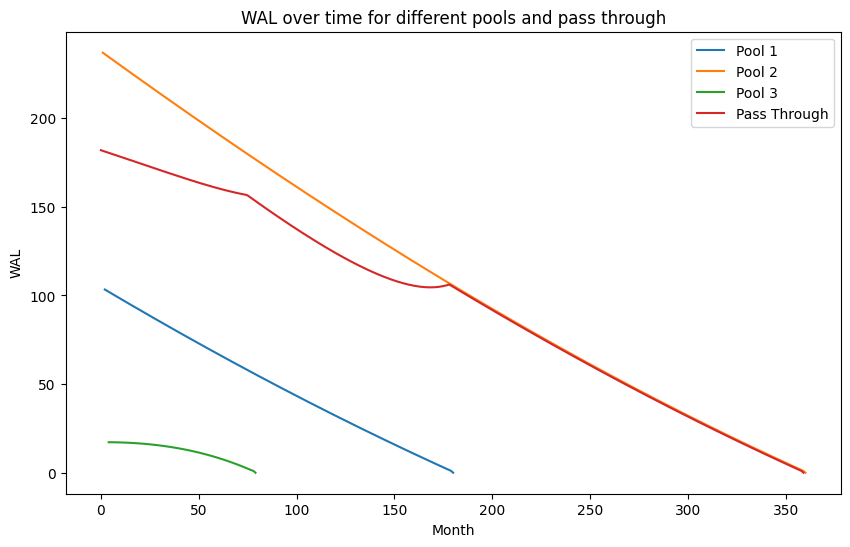

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(pool1_result.index, pool1_result['WAL'], label='Pool 1')
plt.plot(pool2_result.index, pool2_result['WAL'], label='Pool 2')
plt.plot(pool3_result.index, pool3_result['WAL'], label='Pool 3')
plt.plot(pass_through_result.index, pass_through_result['WAL'], label='Pass Through')

plt.xlabel('Month')
plt.ylabel('WAL')
plt.title('WAL over time for different pools and pass through')
plt.legend()

plt.show()

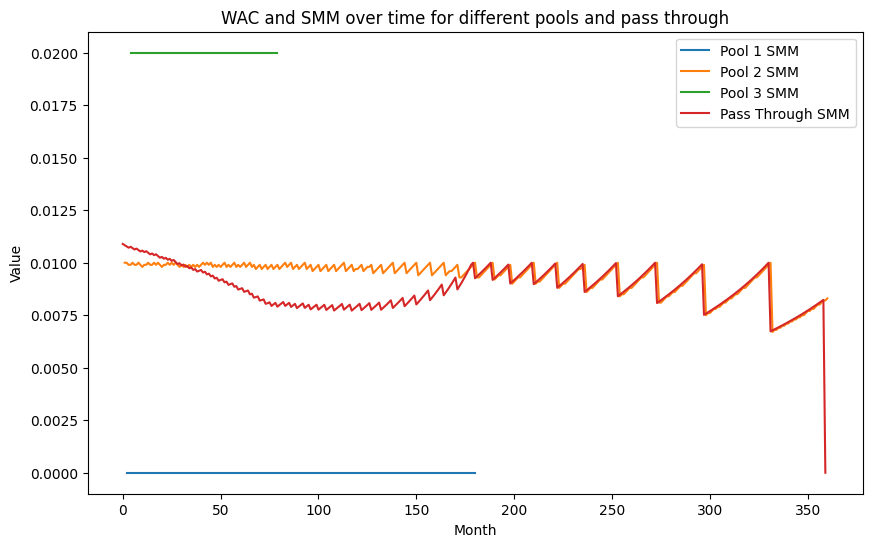

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(pool1_result.index, pool1_result['SMM'], label='Pool 1 SMM')
plt.plot(pool2_result.index, pool2_result['SMM'], label='Pool 2 SMM')
plt.plot(pool3_result.index, pool3_result['SMM'], label='Pool 3 SMM')
plt.plot(pass_through_result.index, pass_through_result['SMM'], label='Pass Through SMM')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('WAC and SMM over time for different pools and pass through')
plt.legend()

plt.show()

# Conclusion

Explain the drivers of trends in WAC, WAL, SMM.

Regarding WAC, the trend is consistent with the individual loan WAC that is WAC is the same for fixed-rate pool if the pool have identical characteristics. It is influenced by its coupon rate of the loans in the pool. The higher the coupon rate, the higher the WAC. However, the WAC is not fixed across the lifycycle of pass-through. Balance changes over time especially if there is a mixture impact of preparyment and curtailment from pool2 and pool3, which results the dynamic of balance of aggregate loans more complex.

Regarding WAL, the major drivers of WAL is loan maturity and curtailment. In pool3, while fixing the SMM the same across the time and assume that borrowers just curtail rather than prepay, the WAL is lowest among the pools. The second driver is loan maturity, the higher maturity is, the higher WAL is. Pass-through WAL is bounded by the highest WAL of the pools and is mixture of WALs of the pools. The aggregation of WALs of the pools is not linear, it is influenced by the balance of the loans in the pools. 

Regarding SMM, the driver of SMM is curtailment and prepayment. If there is no curtailment or prepayment, then SMM is zero. Also, comparing to the effect of curtailment and prepayment. The impact of curtailment keeps the SMM elevated over time, which has a higher impact on the SMM than prepayment. Pass-Trhough SMM is the aggregation of SMMs of the pools, for which the shape resembles with ones of pools. 